# Linear Regression from Scratch using Gradient Descent
This notebook demonstrates how to implement linear regression **from scratch** using Python, with a custom implementation of **gradient descent** and **mean squared error (MSE)**.

We will compare this to the sklearn implementation at the end to see how well our algorithm performs.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')

## 📉 Mean Squared Error (MSE) — Explained

### 🔎 What is MSE?

**Mean Squared Error (MSE)** is a commonly used loss function in regression problems. It measures how well your model's predicted values match the actual values by calculating the **average of the squared differences** between them.

It answers the question:

> *"On average, how far off are my predictions from the actual values — and how large are those errors?"*

---

### 📐 MSE Formula

The mathematical formula for MSE is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:

* $n$: Number of data points
* $y_i$: Actual value for the $i$-th observation
* $\hat{y}_i = mx_i + b$: Predicted value from the linear regression model
* $y_i - \hat{y}_i$: The prediction error
* $(y_i - \hat{y}_i)^2$: The squared error for that point

---

### 🧠 Why Do We Square the Errors?

* Squaring ensures that **positive and negative errors don't cancel out**.
* It also **penalizes larger errors more**, making the model strive for precision.

---

### 🐍 Python Implementation of MSE

Here's how the MSE is implemented in Python using vectorized operations:

```python
def loss_function(m: float, b: float, points: pd.DataFrame) -> float:
    # Computes the Mean Squared Error (MSE) for current m and b.
    x = points['x']
    y = points['y']
    predictions = m * x + b            # Vector of predicted values
    errors = y - predictions           # Vector of residuals/errors
    mse = (errors ** 2).mean()         # Mean of squared errors
    return mse
```

---

### 🔁 Where is the Σ (Summation)?

In the math:

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

In the code:

```python
(errors ** 2).mean()
```

This does the same thing:

* `errors ** 2` squares each error in the vector (element-wise)
* `.mean()` adds them up and divides by $n$, which is exactly the summation and averaging in the formula

So the **sum is performed implicitly** using pandas' efficient vector operations.


In [3]:
def loss_function(m: float, b: float, points: pd.DataFrame) -> float:
    #Computes the Mean Squared Error (MSE) for current m and b.
    x = points['x']
    y = points['y']
    predictions = m * x + b
    errors = y - predictions
    mse = (errors ** 2).mean()
    return mse


## 🔽 Gradient Descent for Linear Regression — Explained

### 🎯 Objective

We want to fit a line of the form:

$$
\hat{y} = mx + b
$$

to a dataset of points $(x_i, y_i)$, such that the line minimizes the total error between the **predicted values** $\hat{y}_i = mx_i + b$ and the **actual values** $y_i$.

The error is measured using the **Mean Squared Error (MSE)**:

$$
E = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

---

## 🧠 How Do We Minimize Error?

To minimize the error function $E$, we use **gradient descent** — an optimization algorithm that takes small steps in the direction of **steepest descent** of the error surface.

---

### 🧮 Step 1: Compute Partial Derivatives

We find the **partial derivatives** of $E$ with respect to $m$ and $b$ to know how to change each parameter to **reduce the error**.

#### ✅ Partial derivative of E with respect to $m$:

$$
\frac{\partial E}{\partial m} = \frac{-2}{n} \sum_{i=1}^{n} x_i \cdot \left(y_i - (mx_i + b)\right)
$$

#### ✅ Partial derivative of E with respect to $b$:

$$
\frac{\partial E}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n} \left(y_i - (mx_i + b)\right)
$$

These derivatives give us the **slope** of the error surface with respect to each parameter — i.e., they tell us the direction of the **steepest ascent** in error.

---

### 📉 Step 2: Move in the Opposite Direction (Descent)

To **minimize** error (rather than increase it), we take a step in the **opposite direction** of the gradient:

$$
m = m - \alpha \cdot \frac{\partial E}{\partial m}
$$

$$
b = b - \alpha \cdot \frac{\partial E}{\partial b}
$$

Where:

* $\alpha$ is the **learning rate** — a small constant that controls how large each update step is.
* A small $\alpha$ = slower learning but more stable
* A large $\alpha$ = faster learning but can overshoot or diverge

---

## 🧪 Gradient Descent in Python

Here’s how the logic above is implemented in your function:

```python
def gradient_descent(points: pd.DataFrame, m_now: float, b_now: float, learning_rate: float) -> tuple[float, float]:
    # Performs one step of gradient descent and returns updated m and b.
    
    x = points['x']
    y = points['y']
    N = len(points)

    predictions = m_now * x + b_now             # Compute predictions
    errors = y - predictions                    # Compute residuals (errors)

    # Compute gradients (partial derivatives)
    m_gradient = (-2 / N) * (x * errors).sum()
    b_gradient = (-2 / N) * errors.sum()

    # Update m and b using gradient descent
    new_m = m_now - learning_rate * m_gradient
    new_b = b_now - learning_rate * b_gradient

    return new_m, new_b
```

---

### 🧭 Interpretation: How Gradient Descent Works

* The gradients $\frac{\partial E}{\partial m}$ and $\frac{\partial E}{\partial b}$ **point in the direction of the steepest increase** in error.
* By subtracting these gradients (i.e., going the **opposite direction**), we move **toward the lowest point** on the error surface — the optimal values of $m$ and $b$.
* Each iteration of gradient descent updates $m$ and $b$ to bring predictions closer to the true values, **reducing the total error**.

---

### 📌 Summary

| Concept                      | Explanation                                                            |
| ---------------------------- | ---------------------------------------------------------------------- |
| **Loss Function (E)**        | Mean Squared Error (average of squared residuals)                      |
| **Goal**                     | Find values of $m$ and $b$ that minimize $E$                           |
| **Gradient**                 | The vector of partial derivatives w\.r.t. $m$ and $b$                  |
| **Descent Direction**        | Opposite of gradient                                                   |
| **Learning Rate ($\alpha$)** | Controls the size of the update step                                   |
| **Update Rule**              | $m = m - \alpha \cdot \frac{\partial E}{\partial m}$, and same for $b$ |


In [5]:
def gradient_descent(points: pd.DataFrame, m_now: float, b_now: float, learning_rate: float) -> tuple[float, float]:
    #Performs one step of gradient descent and returns updated m and b.
    x = points['x']
    y = points['y']
    N = len(points)

    predictions = m_now * x + b_now
    errors = y - predictions

    m_gradient = (-2 / N) * (x * errors).sum()
    b_gradient = (-2 / N) * errors.sum()

    new_m = m_now - learning_rate * m_gradient
    new_b = b_now - learning_rate * b_gradient

    return new_m, new_b


# Example

In [6]:
df = pd.read_csv("linear_data.csv")
print(df.head())


     x     y
0  1.0   6.7
1  2.0   9.1
2  3.0  11.2
3  4.0  13.5
4  5.0  16.0


In [7]:
m = 0
b = 0
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    m, b = gradient_descent(df, m, b, learning_rate)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: m = {m:.4f}, b = {b:.4f}, Loss = {loss_function(m, b, df):.4f}")


Epoch 0: m = 2.3096, b = 0.3472, Loss = 18.7481
Epoch 100: m = 2.7627, b = 1.6705, Loss = 1.2533
Epoch 200: m = 2.6464, b = 2.4799, Loss = 0.5763
Epoch 300: m = 2.5701, b = 3.0112, Loss = 0.2845
Epoch 400: m = 2.5200, b = 3.3600, Loss = 0.1588
Epoch 500: m = 2.4871, b = 3.5890, Loss = 0.1046
Epoch 600: m = 2.4655, b = 3.7393, Loss = 0.0812
Epoch 700: m = 2.4513, b = 3.8380, Loss = 0.0712
Epoch 800: m = 2.4420, b = 3.9028, Loss = 0.0668
Epoch 900: m = 2.4359, b = 3.9454, Loss = 0.0650


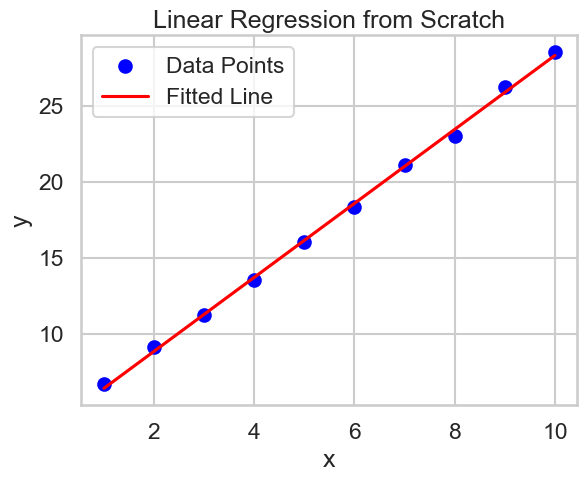

In [10]:
plt.scatter(df.x, df.y, color='blue', label='Data Points')
plt.plot(df.x, m * df.x + b, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression from Scratch')
plt.grid(True)
plt.show()

## Using Boston Housing dataset (via GitHub)

In [20]:
from sklearn.model_selection import train_test_split
url = "https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv"
df = pd.read_csv(url)

df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
X = df[['rm']]  # Feature
y = df['medv']  # Target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Convert to single DataFrame for our custom functions
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
train_data.columns = ['x', 'y']

test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_data.columns = ['x', 'y']

In [24]:
# Initial values
m = 0
b = 0
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs + 1):
    m, b = gradient_descent(train_data, m, b, learning_rate)
    if epoch % 100 == 0:
        loss = loss_function(m, b, train_data)
        print(f"Epoch {epoch}: m = {m:.4f}, b = {b:.4f}, Loss = {loss:.4f}")


Epoch 0: m = 2.9735, b = 0.4559, Loss = 76.0768
Epoch 100: m = 3.7306, b = -0.3296, Loss = 59.0315
Epoch 200: m = 3.8653, b = -1.1908, Loss = 58.2718
Epoch 300: m = 3.9967, b = -2.0313, Loss = 57.5480
Epoch 400: m = 4.1251, b = -2.8517, Loss = 56.8586
Epoch 500: m = 4.2503, b = -3.6524, Loss = 56.2018
Epoch 600: m = 4.3725, b = -4.4339, Loss = 55.5762
Epoch 700: m = 4.4918, b = -5.1967, Loss = 54.9801
Epoch 800: m = 4.6083, b = -5.9411, Loss = 54.4124
Epoch 900: m = 4.7219, b = -6.6678, Loss = 53.8715
Epoch 1000: m = 4.8329, b = -7.3770, Loss = 53.3563


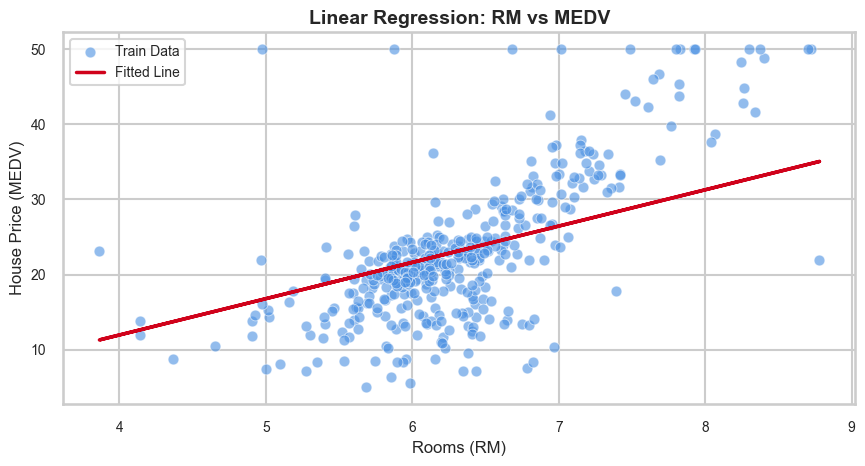

In [30]:
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")

sns.scatterplot(x='x', y='y', data=train_data, s=60, alpha=0.6, edgecolor='white', color='#4A90E2', label='Train Data')

plt.plot(train_data['x'], m * train_data['x'] + b, color='#D0021B', linewidth=2.5, label='Fitted Line')

plt.title('Linear Regression: RM vs MEDV', fontsize=14, weight='bold')
plt.xlabel('Rooms (RM)', fontsize=12)
plt.ylabel('House Price (MEDV)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()


In [27]:
# Predict on test set
test_predictions = m * test_data['x'] + b

# Calculate MSE on test set
test_mse = ((test_data['y'] - test_predictions) ** 2).mean()
print(f"\nTest MSE: {test_mse:.4f}")


Test MSE: 50.5719
